In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

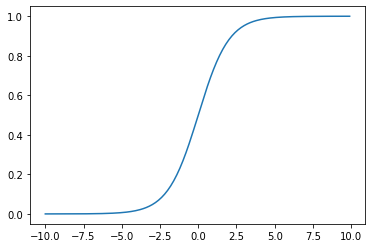

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

In [3]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [4]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test.head()

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
82,5.8,2.7,1,1.2,False,versicolor
134,6.1,2.6,1,1.4,False,virginica
114,5.8,2.8,1,2.4,False,virginica
42,4.4,3.2,1,0.2,True,setosa
109,7.2,3.6,1,2.5,False,virginica


## Overview

1. regression for petal width
2. binary classification for setosa: T/F
3. binary classification for setosa: prob(T)
4. multi-class classification for variety

In [5]:
# model 1: features => petal width
reg = LinearRegression(fit_intercept=False)
reg.fit(train[["sepal length (cm)", "sepal width (cm)", "const"]],
          train["petal width (cm)"])
#reg.predict(test[["sepal length (cm)", "sepal width (cm)", "const"]])
reg.score(test[["sepal length (cm)", "sepal width (cm)", "const"]],
            test["petal width (cm)"])

0.5805709195672956

In [6]:
# model 2: features => is it a setosa?
cls = LogisticRegression(fit_intercept=False)
cls.fit(train[["sepal length (cm)", "sepal width (cm)", "const"]],
          train["setosa"])
#model.predict(test[["sepal length (cm)", "sepal width (cm)", "const"]])
cls.score(test[["sepal length (cm)", "sepal width (cm)", "const"]],
            test["setosa"])

1.0

In [7]:
test["predict"] = cls.predict(test[["sepal length (cm)", "sepal width (cm)", "const"]])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predict
82,5.8,2.7,1,1.2,False,versicolor,False
134,6.1,2.6,1,1.4,False,virginica,False
114,5.8,2.8,1,2.4,False,virginica,False
42,4.4,3.2,1,0.2,True,setosa,True
109,7.2,3.6,1,2.5,False,virginica,False
57,4.9,2.4,1,1.0,False,versicolor,False
1,4.9,3.0,1,0.2,True,setosa,True
70,5.9,3.2,1,1.8,False,versicolor,False
25,5.0,3.0,1,0.2,True,setosa,True
84,5.4,3.0,1,1.5,False,versicolor,False


In [8]:
# [[False Prob, True Prob], ...]
prob = cls.predict_proba(test[["sepal length (cm)",
                                  "sepal width (cm)", "const"]])
prob

array([[0.9405628 , 0.0594372 ],
       [0.97972503, 0.02027497],
       [0.91463241, 0.08536759],
       [0.07056997, 0.92943003],
       [0.93345725, 0.06654275],
       [0.85227945, 0.14772055],
       [0.35722665, 0.64277335],
       [0.74147607, 0.25852393],
       [0.41451931, 0.58548069],
       [0.65092753, 0.34907247]])

In [9]:
test["predict_prob"] = prob[:, 1]
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predict,predict_prob
82,5.8,2.7,1,1.2,False,versicolor,False,0.059437
134,6.1,2.6,1,1.4,False,virginica,False,0.020275
114,5.8,2.8,1,2.4,False,virginica,False,0.085368
42,4.4,3.2,1,0.2,True,setosa,True,0.929430
109,7.2,3.6,1,2.5,False,virginica,False,0.066543
57,4.9,2.4,1,1.0,False,versicolor,False,0.147721
1,4.9,3.0,1,0.2,True,setosa,True,0.642773
70,5.9,3.2,1,1.8,False,versicolor,False,0.258524
25,5.0,3.0,1,0.2,True,setosa,True,0.585481
84,5.4,3.0,1,1.5,False,versicolor,False,0.349072


In [10]:
# model 3: features => variety
mult = LogisticRegression(fit_intercept=False)
mult.fit(train[["sepal length (cm)", "sepal width (cm)", "const"]],
          train["variety"])
pred = mult.predict(test[["sepal length (cm)", "sepal width (cm)", "const"]])
test["predict"] = pred
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predict,predict_prob
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.059437
134,6.1,2.6,1,1.4,False,virginica,virginica,0.020275
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.085368
42,4.4,3.2,1,0.2,True,setosa,setosa,0.929430
109,7.2,3.6,1,2.5,False,virginica,virginica,0.066543
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.147721
1,4.9,3.0,1,0.2,True,setosa,setosa,0.642773
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.258524
25,5.0,3.0,1,0.2,True,setosa,setosa,0.585481
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.349072


In [11]:
mult.score(test[["sepal length (cm)", "sepal width (cm)", "const"]],
            test["variety"])

0.9

In [12]:
reg, cls, mult

(LinearRegression(fit_intercept=False),
 LogisticRegression(fit_intercept=False),
 LogisticRegression(fit_intercept=False))

In [13]:
reg.coef_

array([ 0.71452794, -0.48708032, -1.5013766 ])

In [14]:
cls.coef_

array([[-2.42108094,  3.90002306,  0.75064911]])

In [15]:
mult.coef_

array([[-1.80097204,  3.01989635,  0.69404974],
       [ 0.64875706, -1.46308696,  1.04354373],
       [ 1.15221498, -1.55680939, -1.73759347]])

In [16]:
def reg_predict(X):
    return X.values @ reg.coef_.reshape(-1,1)

reg_predict(test[["sepal length (cm)", "sepal width (cm)", "const"]])

array([[1.32776857],
       [1.59083498],
       [1.27906054],
       [0.0838893 ],
       [1.8897354 ],
       [0.83081752],
       [0.53856933],
       [1.15568121],
       [0.61002213],
       [0.8958333 ]])

In [17]:
def cls_predict(X):
    return X.values @ cls.coef_.reshape(-1,1) > 0

cls_predict(test[["sepal length (cm)", "sepal width (cm)", "const"]])

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [18]:
def cls_predict_proba(X):
    return sigmoid(X.values @ cls.coef_.reshape(-1,1))

cls_predict_proba(test[["sepal length (cm)", "sepal width (cm)", "const"]])

array([[0.0594372 ],
       [0.02027497],
       [0.08536759],
       [0.92943003],
       [0.06654275],
       [0.14772055],
       [0.64277335],
       [0.25852393],
       [0.58548069],
       [0.34907247]])

In [19]:
# we have 3 varieties, want to score each for how likely it is that one
# each column of mult.coef_.T gives coefficients corresponding to one variety
mult.coef_.T

array([[-1.80097204,  0.64875706,  1.15221498],
       [ 3.01989635, -1.46308696, -1.55680939],
       [ 0.69404974,  1.04354373, -1.73759347]])

In [20]:
X = test[["sepal length (cm)", "sepal width (cm)", "const"]].values
X @ mult.coef_.T[:, 0:1] # scores for the first variety

array([[-1.59786793],
       [-2.44014918],
       [-1.2958783 ],
       [ 2.43344109],
       [-1.40132207],
       [-0.88296201],
       [ 0.9289758 ],
       [-0.26801696],
       [ 0.7488786 ],
       [ 0.02848978]])

In [21]:
X @ mult.coef_.T[:, 1:2] # scores for the second variety

array([[ 0.85599987],
       [ 1.19693568],
       [ 0.70969118],
       [-0.78380349],
       [ 0.44748149],
       [ 0.71104461],
       [-0.16680757],
       [ 0.1893321 ],
       [-0.10193186],
       [ 0.15757096]])

In [22]:
X @ mult.coef_.T

array([[-1.59786793,  0.85599987,  0.74186806],
       [-2.44014918,  1.19693568,  1.24321349],
       [-1.2958783 ,  0.70969118,  0.58618712],
       [ 2.43344109, -0.78380349, -1.6496376 ],
       [-1.40132207,  0.44748149,  0.95384058],
       [-0.88296201,  0.71104461,  0.1719174 ],
       [ 0.9289758 , -0.16680757, -0.76216824],
       [-0.26801696,  0.1893321 ,  0.07868487],
       [ 0.7488786 , -0.10193186, -0.64694674],
       [ 0.02848978,  0.15757096, -0.18606075]])

In [23]:
(X @ mult.coef_.T).max() # biggest number

2.4334410884892166

In [24]:
(X @ mult.coef_.T).max(axis=1) # biggest number per row

array([0.85599987, 1.24321349, 0.70969118, 2.43344109, 0.95384058,
       0.71104461, 0.9289758 , 0.1893321 , 0.7488786 , 0.15757096])

In [25]:
(X @ mult.coef_.T).argmax(axis=1) # position biggest number per row

array([1, 2, 1, 0, 2, 1, 0, 1, 0, 1])

In [26]:
mult.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
mult.classes_[[0,0,1,2,2,2]]

array(['setosa', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica'], dtype=object)

In [28]:
def mult_predict(X):
    return mult.classes_[(X.values @ mult.coef_.T).argmax(axis=1)]

mult_predict(test[["sepal length (cm)", "sepal width (cm)", "const"]])

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [30]:
X = test[["sepal length (cm)", "sepal width (cm)", "const"]]
X.values

array([[5.8, 2.7, 1. ],
       [6.1, 2.6, 1. ],
       [5.8, 2.8, 1. ],
       [4.4, 3.2, 1. ],
       [7.2, 3.6, 1. ],
       [4.9, 2.4, 1. ],
       [4.9, 3. , 1. ],
       [5.9, 3.2, 1. ],
       [5. , 3. , 1. ],
       [5.4, 3. , 1. ]])

In [31]:
mult.coef_.T

array([[-1.80097204,  0.64875706,  1.15221498],
       [ 3.01989635, -1.46308696, -1.55680939],
       [ 0.69404974,  1.04354373, -1.73759347]])

In [32]:
X.values @ mult.coef_.T

array([[-1.59786793,  0.85599987,  0.74186806],
       [-2.44014918,  1.19693568,  1.24321349],
       [-1.2958783 ,  0.70969118,  0.58618712],
       [ 2.43344109, -0.78380349, -1.6496376 ],
       [-1.40132207,  0.44748149,  0.95384058],
       [-0.88296201,  0.71104461,  0.1719174 ],
       [ 0.9289758 , -0.16680757, -0.76216824],
       [-0.26801696,  0.1893321 ,  0.07868487],
       [ 0.7488786 , -0.10193186, -0.64694674],
       [ 0.02848978,  0.15757096, -0.18606075]])

In [34]:
(X.values @ mult.coef_.T).argmax(axis=1)

array([1, 2, 1, 0, 2, 1, 0, 1, 0, 1])

In [35]:
mult.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
mult.classes_[(X.values @ mult.coef_.T).argmax(axis=1)]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

# Visualize Decision Boundaries

In [39]:
import numpy as np   # np.meshgrid
import matplotlib.pyplot as plt   # plt.contourf

In [41]:
X, Y = np.meshgrid(np.arange(0, 10), np.arange(10))

In [44]:
print(X)
print()
print(Y)

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]

[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]


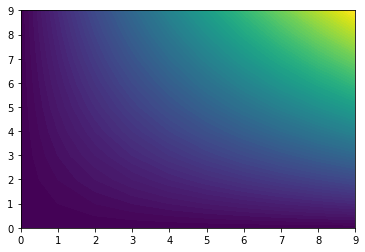

In [51]:
Z = X * Y
print(Z)
plt.contourf(X, Y, Z, levels=100)

In [69]:
X, Y = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))

In [70]:
cls.feature_names_in_

array(['sepal length (cm)', 'sepal width (cm)', 'const'], dtype=object)

In [72]:
predict_df = pd.DataFrame({
    'sepal length (cm)': X.reshape(-1),
    'sepal width (cm)': Y.reshape(-1),
    'const': 1
})

predict_df["prediction"] = cls.predict(predict_df)
predict_df.head()

,sepal length (cm),sepal width (cm),const,prediction
0,0.0,0.0,1,True
1,0.1,0.0,1,True
2,0.2,0.0,1,True
3,0.3,0.0,1,True
4,0.4,0.0,1,False


In [77]:
# plt.gca() # current axes area

matplotlib.contour.QuadContourSet

(<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,)

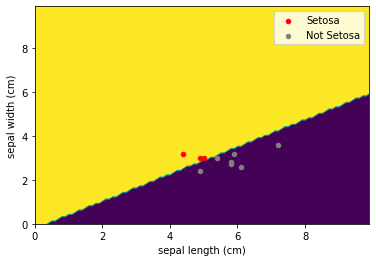

In [85]:
Z = predict_df["prediction"].values.reshape(X.shape)
plt.contourf(X, Y, Z, levels=100)

setosa_df = test[test["variety"] == "setosa"]
other_df = test[test["variety"] != "setosa"]
setosa_df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)", 
                       ax=plt.gca(), color="red", label="Setosa")
other_df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)",
                      ax=plt.gca(), color="gray", label="Not Setosa"),

In [86]:
predict_df

,sepal length (cm),sepal width (cm),const,prediction
0,0.0,0.0,1,True
1,0.1,0.0,1,True
2,0.2,0.0,1,True
3,0.3,0.0,1,True
4,0.4,0.0,1,False
...,...,...,...,...
9995,9.5,9.9,1,True
9996,9.6,9.9,1,True
9997,9.7,9.9,1,True
9998,9.8,9.9,1,True


## 3+ categories

In [88]:
predict_df = pd.DataFrame({
    'sepal length (cm)': X.reshape(-1),
    'sepal width (cm)': Y.reshape(-1),
    'const': 1
})
predict_df["prediction"] = mult.predict(predict_df)
predict_df

,sepal length (cm),sepal width (cm),const,prediction
0,0.0,0.0,1,versicolor
1,0.1,0.0,1,versicolor
2,0.2,0.0,1,versicolor
3,0.3,0.0,1,versicolor
4,0.4,0.0,1,versicolor
...,...,...,...,...
9995,9.5,9.9,1,setosa
9996,9.6,9.9,1,setosa
9997,9.7,9.9,1,setosa
9998,9.8,9.9,1,setosa


In [105]:
Z = predict_df["prediction"].values.reshape(X.shape)
Z

array([['versicolor', 'versicolor', 'versicolor', ..., 'virginica',
        'virginica', 'virginica'],
       ['setosa', 'versicolor', 'versicolor', ..., 'virginica',
        'virginica', 'virginica'],
       ['setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica',
        'virginica'],
       ...,
       ['setosa', 'setosa', 'setosa', ..., 'setosa', 'setosa', 'setosa'],
       ['setosa', 'setosa', 'setosa', ..., 'setosa', 'setosa', 'setosa'],
       ['setosa', 'setosa', 'setosa', ..., 'setosa', 'setosa', 'setosa']],
      dtype=object)

In [106]:
classes = list(mult.classes_)
Z = np.array([classes.index(z) for z in Z.reshape(-1)])
Z = Z.reshape(X.shape)

(<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,)

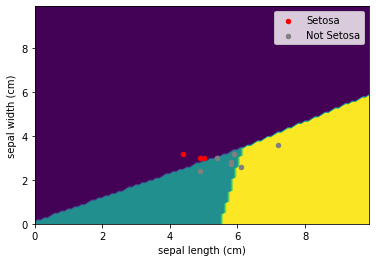

In [107]:
plt.contourf(X, Y, Z, levels=100)

setosa_df = test[test["variety"] == "setosa"]
other_df = test[test["variety"] != "setosa"]
setosa_df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)", 
                       ax=plt.gca(), color="red", label="Setosa")
other_df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)",
                      ax=plt.gca(), color="gray", label="Not Setosa"),
# TODO: different scatters for the 3 categories

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [136]:
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lr", LogisticRegression(max_iter=500)),
])

pipe.fit(train[xcols], train["variety"])

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lr', LogisticRegression(max_iter=500))])

In [131]:
#pd.DataFrame(pipe["poly"].fit_transform(train[xcols]),
#            columns=pipe["poly"].get_feature_names_out()).head()

In [120]:
predict_df = pd.DataFrame({
    'sepal length (cm)': X.reshape(-1),
    'sepal width (cm)': Y.reshape(-1),
    'const': 1
})
predict_df["prediction"] = pipe.predict(predict_df)
predict_df

,sepal length (cm),sepal width (cm),const,prediction
0,0.0,0.0,1,versicolor
1,0.1,0.0,1,versicolor
2,0.2,0.0,1,versicolor
3,0.3,0.0,1,versicolor
4,0.4,0.0,1,versicolor
...,...,...,...,...
9995,9.5,9.9,1,setosa
9996,9.6,9.9,1,setosa
9997,9.7,9.9,1,setosa
9998,9.8,9.9,1,setosa


(<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,)

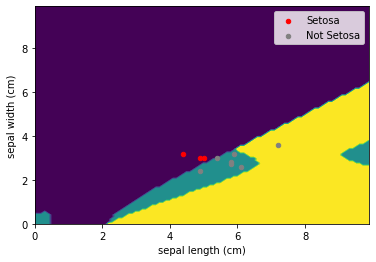

In [121]:
Z = predict_df["prediction"].values.reshape(X.shape)
classes = list(mult.classes_)
Z = np.array([classes.index(z) for z in Z.reshape(-1)])
Z = Z.reshape(X.shape)

plt.contourf(X, Y, Z, levels=100)

setosa_df = test[test["variety"] == "setosa"]
other_df = test[test["variety"] != "setosa"]
setosa_df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)", 
                       ax=plt.gca(), color="red", label="Setosa")
other_df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)",
                      ax=plt.gca(), color="gray", label="Not Setosa"),
# TODO: different scatters for the 3 categories

# How does LogisticRegression choose coef?

In [132]:
# choose random coefficients
# LOOP
#    tweak coefficients slightly to see if we can improve
#    break out of loop if we're not improving


# what data does LogisticRegression want?
# 1. smallish values
# 2. "centered" values (average of a column is zero)

In [137]:
x = np.array([1,2,9,10])
x

array([ 1,  2,  9, 10])

In [141]:
(x - x.mean()) / x.std() # standardization

array([-1.11631261, -0.86824314,  0.86824314,  1.11631261])

In [142]:
from sklearn.preprocessing import StandardScaler

In [144]:
StandardScaler().fit_transform(x.reshape(-1,1))

array([[-1.11631261],
       [-0.86824314],
       [ 0.86824314],
       [ 1.11631261]])

In [146]:
# BEST PRACTICE: always do Poly before Std if you're doing both
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std", StandardScaler()),
    ("lr", LogisticRegression(max_iter=100)),
])

pipe.fit(train[xcols], train["variety"])

Pipeline(steps=[('poly', PolynomialFeatures()), ('std', StandardScaler()),
                ('lr', LogisticRegression())])

In [152]:
x = np.array([1,2,9,10])
x = (x - x.mean()) / x.std() # std
x = x ** 2 # poly
x

array([1.24615385, 0.75384615, 0.75384615, 1.24615385])

In [153]:
x = np.array([1,2,9,10])
x = x ** 2 # poly
x = (x - x.mean()) / x.std() # std
x

array([-1.02195597, -0.95457425,  0.77488969,  1.20164053])